In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pytesseract easyocr keras-ocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  

In [4]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
import easyocr
import keras_ocr


In [11]:
your_image_path = '/content/drive/MyDrive/44.jpg'  # Replace with your actual image path


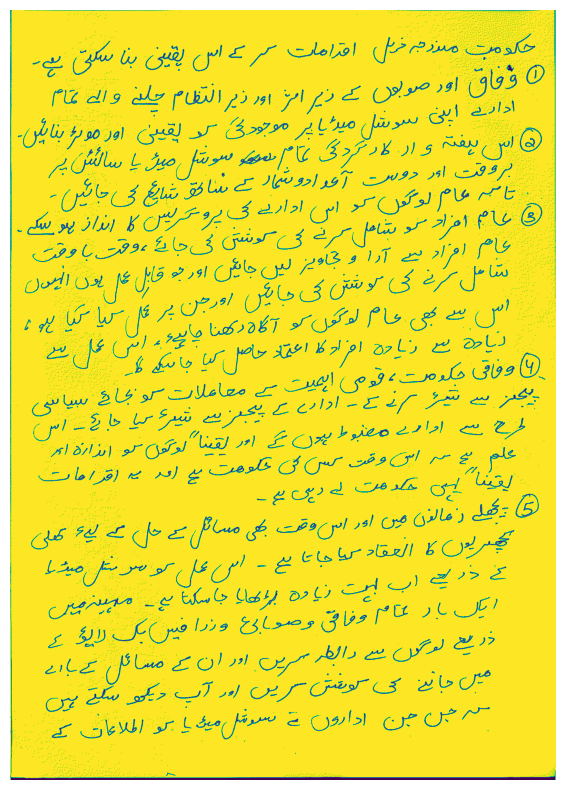

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(your_image_path))
ax.axis('off')
plt.show()


In [7]:
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,081 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [8]:
!apt-get install -y libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 3,744 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1 [582 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Fetched 3,744 kB in 2s (2,354 kB/s)
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121972 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubunt

In [9]:
!wget https://github.com/tesseract-ocr/tessdata_best/raw/main/urd.traineddata -P /usr/share/tesseract-ocr/4.00/tessdata/


--2024-07-09 18:19:49--  https://github.com/tesseract-ocr/tessdata_best/raw/main/urd.traineddata
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/urd.traineddata [following]
--2024-07-09 18:19:49--  https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/urd.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7994323 (7.6M) [application/octet-stream]
Saving to: ‘/usr/share/tesseract-ocr/4.00/tessdata/urd.traineddata’

urd.traineddata     100%[===================>]   7.62M  --.-KB/s    in 0.07s   

2024-07-09 18:19:49 (110 MB/s) - ‘/usr/share/tes

 

سم پل ئَ
نر ال اور زم التظام حلن والے ۵ ٴ
سربقل میڈ یر مدق سر پقینن اور موب باہاں۔
(ع) اس ہفۃ و ار ظا رگد ما سر سوستل صوڑ با رکاش پیم
ضروفت اہر ہے آروراروسار ے سائز اق ڑےحاشرم۔
نا عم ما۴ لوگیں سی ار اداریے جک ا و ا انٰراز پھر بلک _
كی کا۴ مزا سو ساعل ہرے پ سر حا معقس ب وٹ
"00 4 کاە٭یزر لیں جاش اور تے قل ئ ہیں الیسں
ھا : رت
برغ کن ول بی واؤں ہر 6 سیا سیا پر ر
ار سے 2 - -2 فاپنء, لاس کل سے
لاہ سے راوح ام اعد حا لئ جا سے لپ
لاوق لمت > فی امیںے ہے مصاعلات ‏ ہو ۶ا3
بگفزر ہیس مم کر ہے س اھر یو .

سے

سای
تم سے شر ہا حا بے (۔
مرح سے اُداھے صعبوط پہروں حر اور لتینا'یگح سو (ی زاب ابر
لے سر ان مس سس یق علرمت بے لہ عہ (ور_اواٹکت
حما“ یی طدمت دی
لا دنم رمالئن میں اور ابر ںوٹرے کی سائل ے حل کے ےیء یں
رس چپ العقاد عیاجاعا ہے _ اس ھا مھ ص رس ەیشا
کے حر ہے اب ات روم لڑھاا جاسکتا ج- میسہصںس
اگل نار گ٦‏ عفاق وصو )یع وا )کل ررروؤ بر
قد لرگیں ہے الٹہ ہیں اور ان سے مسائل )رہ
گل عاثۓ ک سض سریں اہر آ میلو سے ہیں
سہ جں جن ادابوں ے سسٹ ل میٹ ا کر اللاوان سے

اہر

 

 



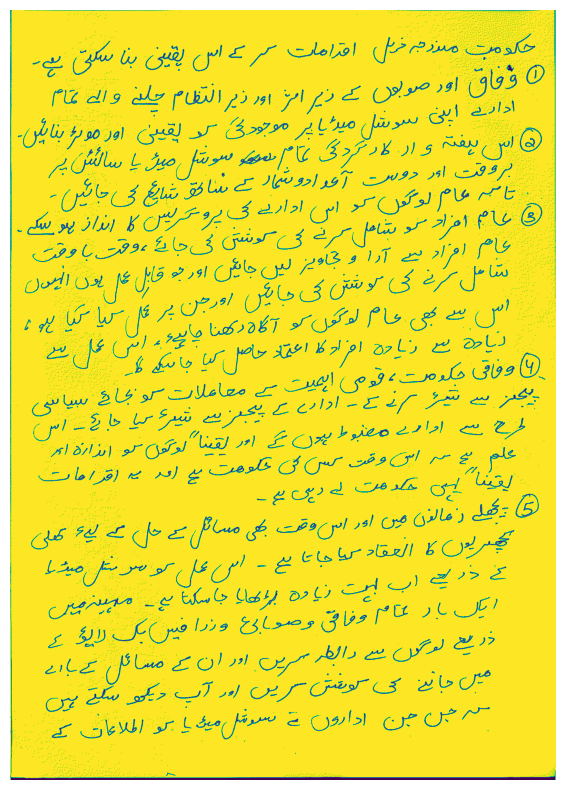

In [13]:
print(pytesseract.image_to_string(your_image_path, lang='urd'))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(your_image_path))
ax.axis('off')
plt.show()


In [14]:
reader = easyocr.Reader(['ur'], gpu=True)
results = reader.readtext(your_image_path)
easyocr_df = pd.DataFrame(results, columns=['bbox', 'text', 'conf'])
print(easyocr_df)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


                                                  bbox        text      conf
0     [[836, 91], [1055, 91], [1055, 155], [836, 155]]   ا 9را مات  0.311880
1    [[1093, 79], [1371, 79], [1371, 169], [1093, 1...  مدددج خراں  0.195747
2       [[97, 137], [169, 137], [169, 205], [97, 205]]           ٤  0.978122
3     [[325, 103], [541, 103], [541, 193], [325, 193]]    بفیبی با  0.276595
4     [[216, 212], [306, 212], [306, 292], [216, 292]]          اے  0.384097
..                                                 ...         ...       ...
142  [[1349.0597149997093, 2007.2388599988374], [14...          مس  0.810233
143  [[343.2270311712883, 2045.1989371536683], [498...       _93>   0.320999
144  [[95.91541525424564, 2073.2447440678316], [215...          0_  0.281920
145  [[1245.3351388442811, 2119.175152568121], [136...          حن  0.514255
146  [[905.104350558472, 2133.227837289735], [1046....        ارول  0.358083

[147 rows x 3 columns]


Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
6/6 [==============================] - 7s 59ms/step
      text                                               bbox
0    pdius  [[1098.8119, 87.67268], [1364.8767, 77.43943],...
1           [[1383.1276, 97.094505], [1591.8121, 90.25239]...
2     leal  [[840.5781, 95.93555], [1055.291, 95.93555], [...
3       cu  [[402.68448, 110.208885], [533.885, 106.46028]...
4       si  [[550.4873, 107.356445], [648.70703, 107.35644...
..     ...                                                ...
187     dl  [[1032.4492, 2133.4238], [1082.7012, 2133.4238...
188     os  [[1125.1869, 2140.7332], [1241.0658, 2131.0767...
189      s  [[840.5781, 2142.5605], [879.4092, 2142.5605],...
190      s  [[433.99414, 2149.413], [502.51953, 2149.413],...
191   ssyi  [[205.68634, 2160.543], [411.2662, 2139.5654],...

[192 rows x 2 columns]


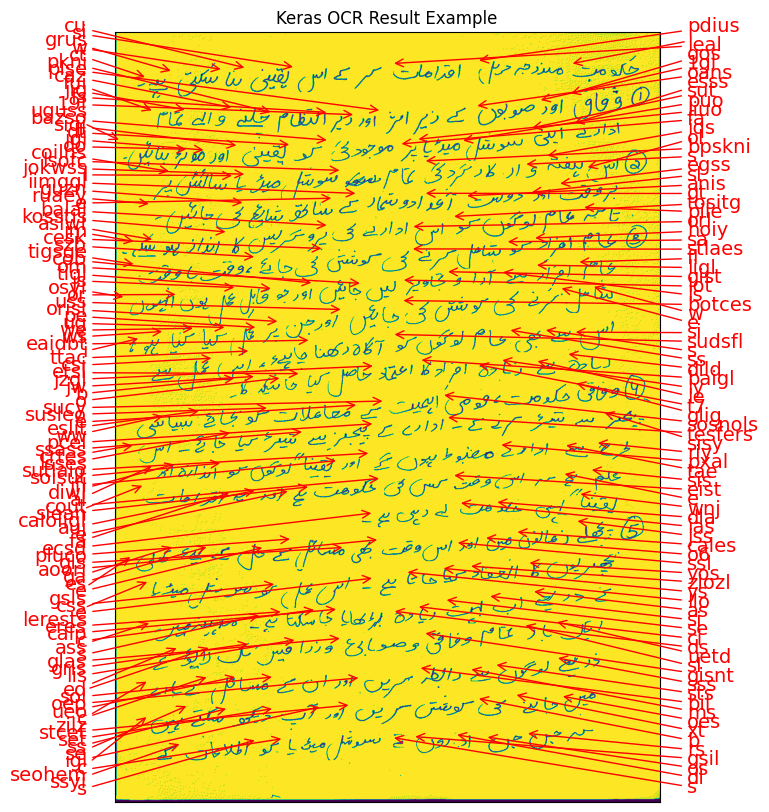

In [15]:
pipeline = keras_ocr.pipeline.Pipeline()
results = pipeline.recognize([your_image_path])
kerasocr_df = pd.DataFrame(results[0], columns=['text', 'bbox'])
print(kerasocr_df)

fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(your_image_path), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()


In [17]:
def plot_compare(img_path, easyocr_df, kerasocr_df):
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    easy_results = easyocr_df[['text', 'bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_path),
                                    easy_results, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize=24)

    keras_results = kerasocr_df[['text', 'bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_path),
                                    keras_results, ax=axs[1])
    axs[1].set_title('keras_ocr results', fontsize=24)
    plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1747 (\N{ARABIC LETTER YEH BARREE WITH HAMZA ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1730 (\N{ARABIC LETTER HEH GOAL WITH HAMZA ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


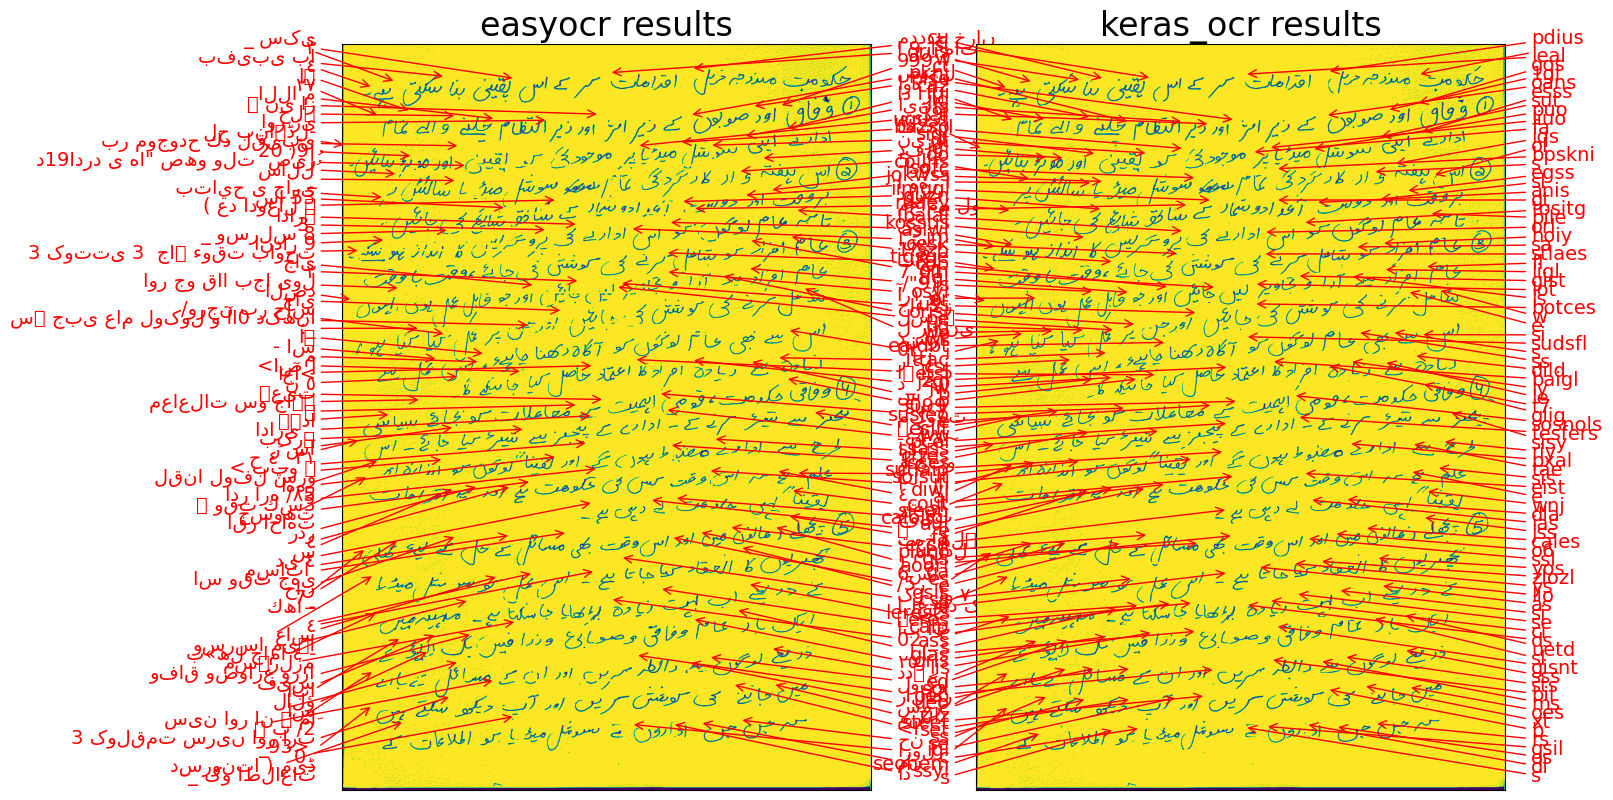

In [18]:
plot_compare(your_image_path, easyocr_df, kerasocr_df)


Pytesseract OCR Result:
 

سم پل ئَ
نر ال اور زم التظام حلن والے ۵ ٴ
سربقل میڈ یر مدق سر پقینن اور موب باہاں۔
(ع) اس ہفۃ و ار ظا رگد ما سر سوستل صوڑ با رکاش پیم
ضروفت اہر ہے آروراروسار ے سائز اق ڑےحاشرم۔
نا عم ما۴ لوگیں سی ار اداریے جک ا و ا انٰراز پھر بلک _
كی کا۴ مزا سو ساعل ہرے پ سر حا معقس ب وٹ
"00 4 کاە٭یزر لیں جاش اور تے قل ئ ہیں الیسں
ھا : رت
برغ کن ول بی واؤں ہر 6 سیا سیا پر ر
ار سے 2 - -2 فاپنء, لاس کل سے
لاہ سے راوح ام اعد حا لئ جا سے لپ
لاوق لمت > فی امیںے ہے مصاعلات ‏ ہو ۶ا3
بگفزر ہیس مم کر ہے س اھر یو .

سے

سای
تم سے شر ہا حا بے (۔
مرح سے اُداھے صعبوط پہروں حر اور لتینا'یگح سو (ی زاب ابر
لے سر ان مس سس یق علرمت بے لہ عہ (ور_اواٹکت
حما“ یی طدمت دی
لا دنم رمالئن میں اور ابر ںوٹرے کی سائل ے حل کے ےیء یں
رس چپ العقاد عیاجاعا ہے _ اس ھا مھ ص رس ەیشا
کے حر ہے اب ات روم لڑھاا جاسکتا ج- میسہصںس
اگل نار گ٦‏ عفاق وصو )یع وا )کل ررروؤ بر
قد لرگیں ہے الٹہ ہیں اور ان سے مسائل )رہ
گل عاثۓ ک سض سریں اہر آ میلو سے ہیں
سہ جں جن ادابوں ے سسٹ ل میٹ ا کر اللاوان سے

اہر

 

 



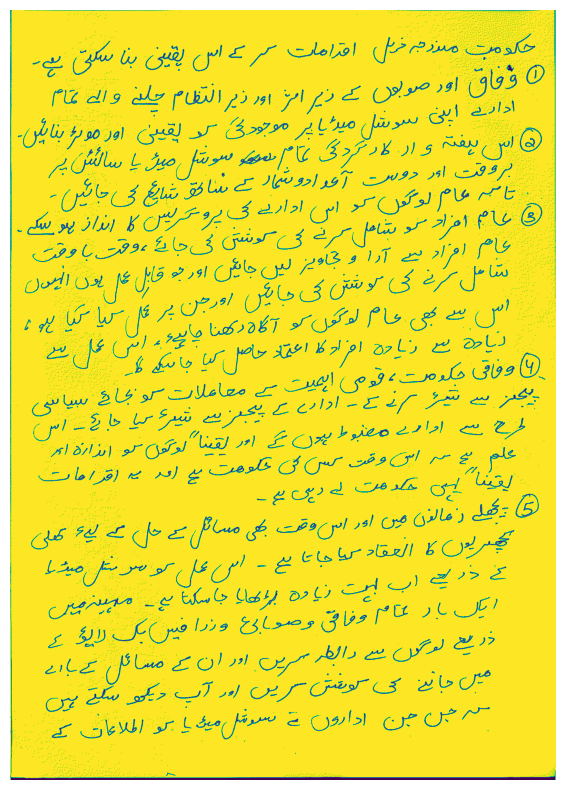

In [20]:
import pytesseract
import matplotlib.pyplot as plt

# Set the path to the tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Path to the uploaded image
img_path = "/content/drive/MyDrive/44.jpg"

# Perform OCR using pytesseract
text_pytesseract = pytesseract.image_to_string(img_path, lang='urd')
print("Pytesseract OCR Result:")
print(text_pytesseract)

# Display the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(img_path))
ax.axis('off')
plt.show()


In [21]:

import easyocr

# Initialize easyocr reader
reader = easyocr.Reader(['ur'], gpu=True)

# Perform OCR using easyocr
result_easyocr = reader.readtext(img_path)
print("EasyOCR Result:")
for result in result_easyocr:
    print(result)


EasyOCR Result:
[[[836, 91], [1055, 91], [1055, 155], [836, 155]], 'ا 9را مات', 0.3118803675928737]
[[[1093, 79], [1371, 79], [1371, 169], [1093, 169]], 'مدددج خراں', 0.19574668556096814]
[[[97, 137], [169, 137], [169, 205], [97, 205]], '٤', 0.978122341207964]
[[[325, 103], [541, 103], [541, 193], [325, 193]], 'بفیبی با', 0.27659533317730695]
[[[216, 212], [306, 212], [306, 292], [216, 292]], 'اے', 0.38409693858262406]
[[[360, 226], [478, 226], [478, 300], [360, 300]], 'حلے', 0.3949655882614576]
[[[646, 240], [800, 240], [800, 312], [646, 312]], 'اور زی', 0.22321275069686142]
[[[807, 221], [1077, 221], [1077, 326], [807, 326]], 'ے نی از', 0.12488042628333845]
[[[1284, 197], [1369, 197], [1369, 260], [1284, 260]], 'اود', 0.5427503379017066]
[[[1388, 267], [1537, 267], [1537, 331], [1388, 331]], 'اد ارے', 0.43993593692687594]
[[[14, 318], [234, 318], [234, 434], [14, 434]], ' لح بناہڈِل-', 0.09447653993622986]
[[[222, 352], [354, 352], [354, 408], [222, 408]], '20 )9|', 0.135335186547910

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
6/6 [==============================] - 2s 82ms/step


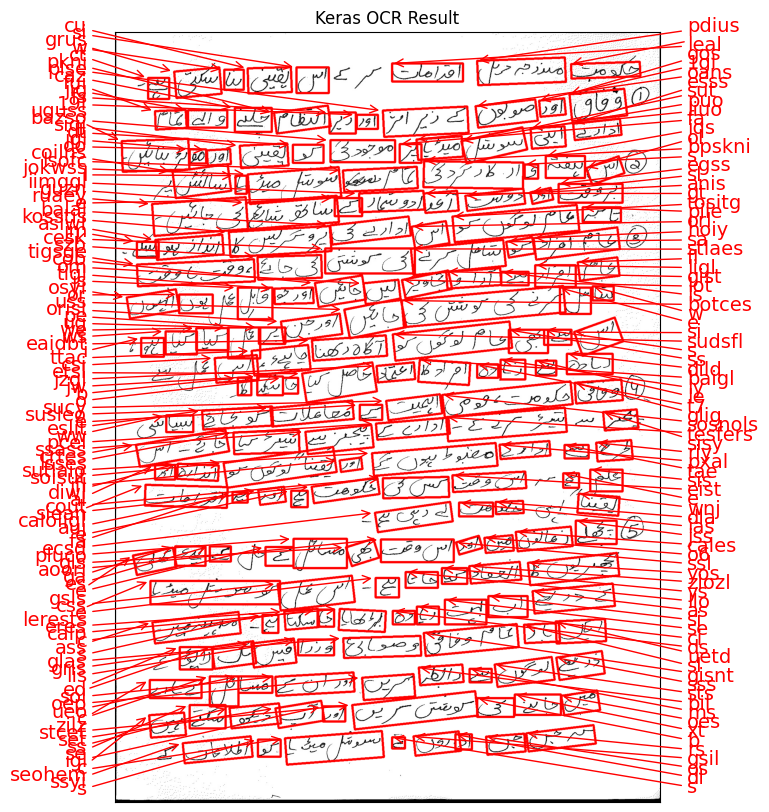

In [22]:
import keras_ocr

# Initialize keras_ocr pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Read the image
images = [keras_ocr.tools.read(img_path)]

# Perform OCR using keras_ocr
prediction_groups = pipeline.recognize(images)

# Visualize the results
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0], ax=ax)
ax.set_title('Keras OCR Result')
plt.show()


EasyOCR Result:
[[[836, 91], [1055, 91], [1055, 155], [836, 155]], 'ا 9را مات', 0.3118803675928737]
[[[1093, 79], [1371, 79], [1371, 169], [1093, 169]], 'مدددج خراں', 0.19574668556096814]
[[[97, 137], [169, 137], [169, 205], [97, 205]], '٤', 0.978122341207964]
[[[325, 103], [541, 103], [541, 193], [325, 193]], 'بفیبی با', 0.27659533317730695]
[[[216, 212], [306, 212], [306, 292], [216, 292]], 'اے', 0.38409693858262406]
[[[360, 226], [478, 226], [478, 300], [360, 300]], 'حلے', 0.3949655882614576]
[[[646, 240], [800, 240], [800, 312], [646, 312]], 'اور زی', 0.22321275069686142]
[[[807, 221], [1077, 221], [1077, 326], [807, 326]], 'ے نی از', 0.12488042628333845]
[[[1284, 197], [1369, 197], [1369, 260], [1284, 260]], 'اود', 0.5427503379017066]
[[[1388, 267], [1537, 267], [1537, 331], [1388, 331]], 'اد ارے', 0.43993593692687594]
[[[14, 318], [234, 318], [234, 434], [14, 434]], ' لح بناہڈِل-', 0.09447653993622986]
[[[222, 352], [354, 352], [354, 408], [222, 408]], '20 )9|', 0.135335186547910

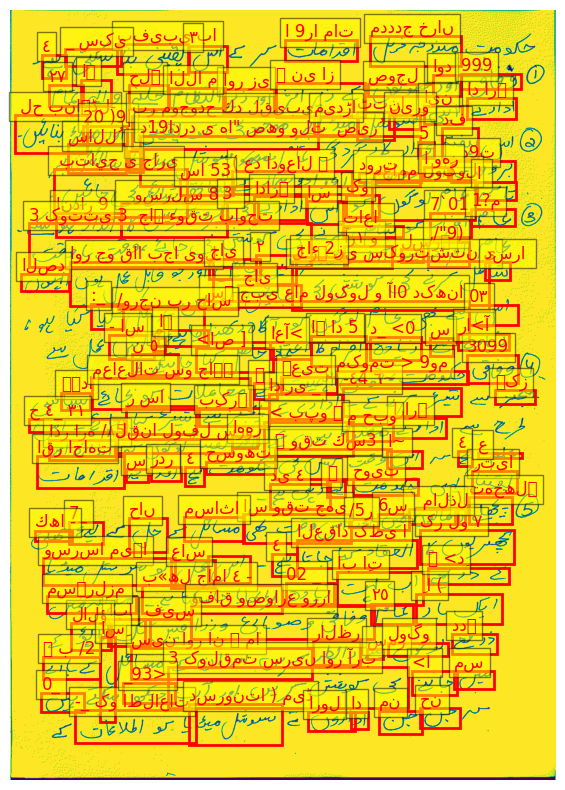

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import easyocr

# Path to the uploaded image
img_path = "/content/drive/MyDrive/44.jpg"

# Initialize easyocr reader
reader = easyocr.Reader(['ur'], gpu=True)

# Perform OCR using easyocr
result_easyocr = reader.readtext(img_path)
print("EasyOCR Result:")
for result in result_easyocr:
    print(result)

# Load the image
image = plt.imread(img_path)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image)

# Add bounding boxes and text annotations to the image
for (bbox, text, prob) in result_easyocr:
    # Get the coordinates of the bounding box
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw the bounding box
    rect = patches.Rectangle((top_left[0], top_left[1]), (bottom_right[0] - top_left[0]), (bottom_right[1] - top_left[1]), linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Add the text annotation
    ax.text(top_left[0], top_left[1] - 10, text, fontsize=12, color='red', bbox=dict(facecolor='yellow', alpha=0.5))

# Hide the axes
ax.axis('off')

# Show the image with annotations
plt.show()
